In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import pickle
import os

import normalise_dataframe as ndf

In [2]:
df = pd.read_csv('Datasets/cleaned_data.csv')
df.head()

,date,id,mood,circumplex.arousal,circumplex.valence,activity,screen,call,sms,appCat.builtin,...,appCat.entertainment,appCat.finance,appCat.game,appCat.office,appCat.other,appCat.social,appCat.travel,appCat.unknown,appCat.weather,appCat.utilities
0,2014-03-04,AS14.17,7.000000,0.500000,1.000000,0.042303,0.0,5.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2014-03-05,AS14.08,6.333333,0.000000,0.333333,0.005556,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2014-03-05,AS14.17,8.000000,0.666667,1.333333,0.042303,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2014-03-06,AS14.17,7.250000,0.500000,0.750000,0.042303,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2014-03-06,AS14.08,7.200000,-0.600000,0.600000,0.005556,0.0,0.0,13.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Feature engineering

## Amount of time spent on phone late at night (9 - 12 pm)
- total
- business related applications
- entertainment related
- etc

In [3]:
def new_origninal_dataset():
    original_dataset = pd.read_csv('Datasets/mood_smartphone.csv', index_col=0)
    print(original_dataset.tail())

    whole_df = original_dataset.pivot_table(index=['time', 'id'], columns='variable', aggfunc='sum', values='value')

    whole_df['date'] = whole_df.index.get_level_values(0)
    whole_df['date'] = pd.to_datetime(whole_df['date'])

    whole_df['time'] = whole_df['date'].apply(lambda x: x.time())
    whole_df['date'] = whole_df['date'].apply(lambda x: x.date())

    # Convert time column to datetime format with a fixed date as a placeholder
    whole_df['hour_of_day_placeholder'] = pd.to_datetime(whole_df['time'].apply(lambda x: datetime.datetime(1900, 1, 1, x.hour)))

    return whole_df#.groupby(['id', 'date']).sum().reset_index()

whole_df = new_origninal_dataset()

whole_df.tail()

              id                     time        variable   value
2770399  AS14.30  2014-04-11 07:51:16.948  appCat.weather   8.032
2772465  AS14.30  2014-04-19 11:00:32.747  appCat.weather   3.008
2774026  AS14.30  2014-04-26 10:19:07.434  appCat.weather   7.026
2774133  AS14.30  2014-04-27 00:44:48.450  appCat.weather  23.033
2784435  AS14.32  2014-04-07 18:25:14.036  appCat.weather  22.431


,variable,activity,appCat.builtin,appCat.communication,appCat.entertainment,appCat.finance,appCat.game,appCat.office,appCat.other,appCat.social,appCat.travel,...,appCat.weather,call,circumplex.arousal,circumplex.valence,mood,screen,sms,date,time,hour_of_day_placeholder
time,id,,,,,,,,,,,,,,,,,,,,,
2014-06-08 11:03:34.453,AS14.24,NaN,44.149,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014-06-08,11:03:34.453000,1900-01-01 11:00:00
2014-06-08 11:04:20.233,AS14.24,NaN,16.064,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014-06-08,11:04:20.233000,1900-01-01 11:00:00
2014-06-08 11:04:36.299,AS14.24,NaN,10.034,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014-06-08,11:04:36.299000,1900-01-01 11:00:00
2014-06-08 11:04:46.335,AS14.24,NaN,8.030,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014-06-08,11:04:46.335000,1900-01-01 11:00:00
2014-06-09 00:00:00.000,AS14.24,0.25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014-06-09,00:00:00,1900-01-01 00:00:00


In [4]:
# def add_late_night_use(df, start_hour=21, end_hour=23):
#     df['late_night_use'] = df['time'].apply(lambda x: x.hour in range(start_hour, end_hour+1))
#     return df

# add_late_night_use(whole_df).tail(5)

In [5]:
def add_late_night_use(df:pd.DataFrame, feature:str=None, start_hour=21, end_hour=23):

    new_feature_name = f'late_night_{feature}_use' if feature else 'late_night_use'

    if feature is None:
        # Create boolean mask based on time hour and feature value
        mask = (df['hour_of_day_placeholder'].dt.hour.between(start_hour, end_hour))
    else:
        # Create boolean mask based on time hour and feature value
        mask = (df['hour_of_day_placeholder'].dt.hour.between(start_hour, end_hour)) & (df[feature] > 0)

    # Create a new column based on the mask
    df[new_feature_name] = False
    df.loc[mask, new_feature_name] = True

    return df


#do for all categories and print results
categories = [x for x in df.columns if x[:3] == 'app'] + ['call', 'sms', 'screen']

for category in categories:
    whole_df = add_late_night_use(whole_df, category)
    print('-'*50, f'\n{category}\n', whole_df[f'late_night_{category}_use'].value_counts())
whole_df.tail()

-------------------------------------------------- 
appCat.builtin
 False    344163
True      14763
Name: late_night_appCat.builtin_use, dtype: int64
-------------------------------------------------- 
appCat.communication
 False    346265
True      12661
Name: late_night_appCat.communication_use, dtype: int64
-------------------------------------------------- 
appCat.entertainment
 False    354181
True       4745
Name: late_night_appCat.entertainment_use, dtype: int64
-------------------------------------------------- 
appCat.finance
 False    358738
True        188
Name: late_night_appCat.finance_use, dtype: int64
-------------------------------------------------- 
appCat.game
 False    358772
True        154
Name: late_night_appCat.game_use, dtype: int64
-------------------------------------------------- 
appCat.office
 False    357855
True       1071
Name: late_night_appCat.office_use, dtype: int64
-------------------------------------------------- 
appCat.other
 False    357448
Tr

,variable,activity,appCat.builtin,appCat.communication,appCat.entertainment,appCat.finance,appCat.game,appCat.office,appCat.other,appCat.social,appCat.travel,...,late_night_appCat.office_use,late_night_appCat.other_use,late_night_appCat.social_use,late_night_appCat.travel_use,late_night_appCat.unknown_use,late_night_appCat.weather_use,late_night_appCat.utilities_use,late_night_call_use,late_night_sms_use,late_night_screen_use
time,id,,,,,,,,,,,,,,,,,,,,,
2014-06-08 11:03:34.453,AS14.24,NaN,44.149,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,False,False,False,False,False,False,False,False,False,False
2014-06-08 11:04:20.233,AS14.24,NaN,16.064,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,False,False,False,False,False,False,False,False,False,False
2014-06-08 11:04:36.299,AS14.24,NaN,10.034,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,False,False,False,False,False,False,False,False,False,False
2014-06-08 11:04:46.335,AS14.24,NaN,8.030,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,False,False,False,False,False,False,False,False,False,False
2014-06-09 00:00:00.000,AS14.24,0.25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,False,False,False,False,False,False,False,False,False,False


In [6]:
#test what happens when booleans are aggregated

#sample dataframe
test = pd.DataFrame({'a':[True, False, True, False], 'b':[True, True, False, False], 'c':[True, True, True, False]})
test['id'] = [1, 1, 2, 2]

print(test)

#groupby and aggregate
test.groupby('id').any()

# df

       a      b      c  id
0   True   True   True   1
1  False   True   True   1
2   True  False   True   2
3  False  False  False   2


,a,b,c
id,,,
1,True,True,True
2,True,False,True


## Since mood's correlation with valence, lets predict valence and provide as feature

In [7]:
#add mood for next day
df['mood_target'] = df['mood'].shift(-1)

<AxesSubplot:>

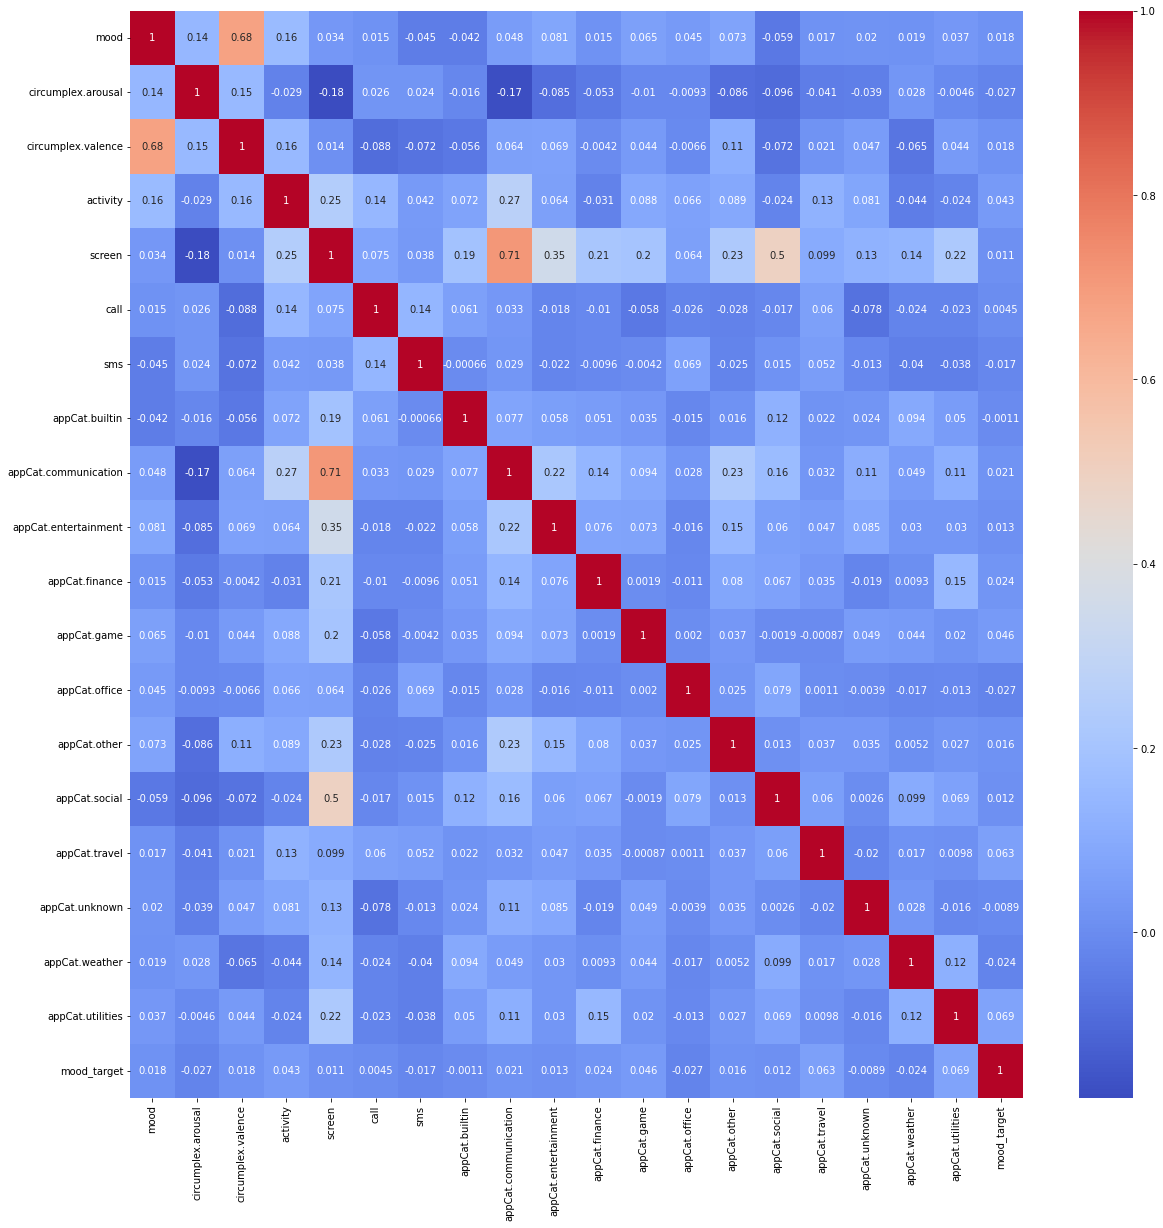

In [8]:

#plot heatmap of correlation
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')


## Adjust mood to classification problem
Transform mood from regression to classification problem
- round to integers

In [9]:
print(df['mood'].value_counts())
def round_feature(df:pd.DataFrame, feature:str):
    df[feature] = df[feature].round()
    return df

# round_feature(df, 'mood')['mood'].value_counts()

7.000000    244
7.200000     99
6.800000     81
8.000000     75
7.400000     73
           ... 
4.333333      1
6.166667      1
7.166667      1
4.666667      1
5.833333      1
Name: mood, Length: 69, dtype: int64


In [10]:
#nested cross validation

## Proportional changes

Predicting numbers may be more difficult than predicting changes. Added benefit is that the model may generalise better

In [11]:
def transform_to_relative_changes(df, feature):
    df[f'{feature}_relative_change'] = df[feature].pct_change()
    return df

df = transform_to_relative_changes(df, 'mood')

df[['mood', 'mood_target', 'mood_relative_change']]

,mood,mood_target,mood_relative_change
0,7.000000,6.333333,NaN
1,6.333333,8.000000,-0.095238
2,8.000000,7.250000,0.263158
3,7.250000,7.200000,-0.093750
4,7.200000,7.500000,-0.006897
...,...,...,...
1300,7.000000,7.500000,0.000000
1301,7.500000,8.000000,0.071429
1302,8.000000,6.500000,0.066667
1303,6.500000,6.500000,-0.187500


## Trailing values
Provide the previous values for 
- mood
- (features that are found the be of predictive value)

Usefull for algorithms not optimised for temporal data. 

In [12]:
def add_previous_values(df, feature, n):
    for i in range(1, n+1):
        df[f'{feature}_prev_{i}'] = df[feature].shift(i)
    return df

add_previous_values(df, 'mood', 3)

,date,id,mood,circumplex.arousal,circumplex.valence,activity,screen,call,sms,appCat.builtin,...,appCat.social,appCat.travel,appCat.unknown,appCat.weather,appCat.utilities,mood_target,mood_relative_change,mood_prev_1,mood_prev_2,mood_prev_3
0,2014-03-04,AS14.17,7.000000,0.500000,1.000000,0.042303,0.000000,5.0,0.0,0.000,...,0.000,0.000,0.0,0.0,0.000,6.333333,NaN,NaN,NaN,NaN
1,2014-03-05,AS14.08,6.333333,0.000000,0.333333,0.005556,0.000000,0.0,0.0,0.000,...,0.000,0.000,0.0,0.0,0.000,8.000000,-0.095238,7.000000,NaN,NaN
2,2014-03-05,AS14.17,8.000000,0.666667,1.333333,0.042303,0.000000,1.0,1.0,0.000,...,0.000,0.000,0.0,0.0,0.000,7.250000,0.263158,6.333333,7.000000,NaN
3,2014-03-06,AS14.17,7.250000,0.500000,0.750000,0.042303,0.000000,1.0,0.0,0.000,...,0.000,0.000,0.0,0.0,0.000,7.200000,-0.093750,8.000000,6.333333,7.000000
4,2014-03-06,AS14.08,7.200000,-0.600000,0.600000,0.005556,0.000000,0.0,13.0,0.000,...,0.000,0.000,0.0,0.0,0.000,7.500000,-0.006897,7.250000,8.000000,6.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1300,2014-06-05,AS14.24,7.000000,0.000000,0.800000,0.152343,2371.588999,11.0,0.0,1749.277,...,171.964,225.737,0.0,0.0,0.000,7.500000,0.000000,7.000000,7.800000,6.750000
1301,2014-06-06,AS14.24,7.500000,0.500000,0.250000,0.189476,2733.332000,16.0,0.0,945.898,...,0.000,0.000,0.0,0.0,2.072,8.000000,0.071429,7.000000,7.000000,7.800000
1302,2014-06-07,AS14.24,8.000000,-1.000000,0.000000,0.081893,5530.377999,0.0,2.0,5027.498,...,106.850,0.000,0.0,0.0,0.000,6.500000,0.066667,7.500000,7.000000,7.000000
1303,2014-06-08,AS14.24,6.500000,-1.500000,1.000000,0.079510,1131.197999,0.0,0.0,351.389,...,190.760,0.000,0.0,0.0,0.000,6.500000,-0.187500,8.000000,7.500000,7.000000


## Extract information about dates 
- Day of week
- Weekday/weekend
- Holidays
- number of days until weekend


In [13]:
def find_day_of_week(df):
    df['day_of_week'] = pd.to_datetime(df['date']).dt.day_name()
    return df
find_day_of_week(df).head()

,date,id,mood,circumplex.arousal,circumplex.valence,activity,screen,call,sms,appCat.builtin,...,appCat.travel,appCat.unknown,appCat.weather,appCat.utilities,mood_target,mood_relative_change,mood_prev_1,mood_prev_2,mood_prev_3,day_of_week
0,2014-03-04,AS14.17,7.000000,0.500000,1.000000,0.042303,0.0,5.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.333333,NaN,NaN,NaN,NaN,Tuesday
1,2014-03-05,AS14.08,6.333333,0.000000,0.333333,0.005556,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,8.000000,-0.095238,7.000000,NaN,NaN,Wednesday
2,2014-03-05,AS14.17,8.000000,0.666667,1.333333,0.042303,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,7.250000,0.263158,6.333333,7.000000,NaN,Wednesday
3,2014-03-06,AS14.17,7.250000,0.500000,0.750000,0.042303,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,7.200000,-0.093750,8.000000,6.333333,7.000000,Thursday
4,2014-03-06,AS14.08,7.200000,-0.600000,0.600000,0.005556,0.0,0.0,13.0,0.0,...,0.0,0.0,0.0,0.0,7.500000,-0.006897,7.250000,8.000000,6.333333,Thursday


In [14]:
def is_weekend(df):
    df['is_weekend'] = df['day_of_week'].isin(['Saturday', 'Sunday'])
    return df
is_weekend(df).head()

,date,id,mood,circumplex.arousal,circumplex.valence,activity,screen,call,sms,appCat.builtin,...,appCat.unknown,appCat.weather,appCat.utilities,mood_target,mood_relative_change,mood_prev_1,mood_prev_2,mood_prev_3,day_of_week,is_weekend
0,2014-03-04,AS14.17,7.000000,0.500000,1.000000,0.042303,0.0,5.0,0.0,0.0,...,0.0,0.0,0.0,6.333333,NaN,NaN,NaN,NaN,Tuesday,False
1,2014-03-05,AS14.08,6.333333,0.000000,0.333333,0.005556,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,8.000000,-0.095238,7.000000,NaN,NaN,Wednesday,False
2,2014-03-05,AS14.17,8.000000,0.666667,1.333333,0.042303,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,7.250000,0.263158,6.333333,7.000000,NaN,Wednesday,False
3,2014-03-06,AS14.17,7.250000,0.500000,0.750000,0.042303,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,7.200000,-0.093750,8.000000,6.333333,7.000000,Thursday,False
4,2014-03-06,AS14.08,7.200000,-0.600000,0.600000,0.005556,0.0,0.0,13.0,0.0,...,0.0,0.0,0.0,7.500000,-0.006897,7.250000,8.000000,6.333333,Thursday,False


In [15]:
def days_until_weekend(df):
    df['days_until_weekend'] = df['day_of_week'].map({'Monday': 5, 'Tuesday': 4, 'Wednesday': 3, 'Thursday': 2, 'Friday': 1, 'Saturday': 0, 'Sunday': 0})
    return df

days_until_weekend(df).head()

,date,id,mood,circumplex.arousal,circumplex.valence,activity,screen,call,sms,appCat.builtin,...,appCat.weather,appCat.utilities,mood_target,mood_relative_change,mood_prev_1,mood_prev_2,mood_prev_3,day_of_week,is_weekend,days_until_weekend
0,2014-03-04,AS14.17,7.000000,0.500000,1.000000,0.042303,0.0,5.0,0.0,0.0,...,0.0,0.0,6.333333,NaN,NaN,NaN,NaN,Tuesday,False,4
1,2014-03-05,AS14.08,6.333333,0.000000,0.333333,0.005556,0.0,0.0,0.0,0.0,...,0.0,0.0,8.000000,-0.095238,7.000000,NaN,NaN,Wednesday,False,3
2,2014-03-05,AS14.17,8.000000,0.666667,1.333333,0.042303,0.0,1.0,1.0,0.0,...,0.0,0.0,7.250000,0.263158,6.333333,7.000000,NaN,Wednesday,False,3
3,2014-03-06,AS14.17,7.250000,0.500000,0.750000,0.042303,0.0,1.0,0.0,0.0,...,0.0,0.0,7.200000,-0.093750,8.000000,6.333333,7.000000,Thursday,False,2
4,2014-03-06,AS14.08,7.200000,-0.600000,0.600000,0.005556,0.0,0.0,13.0,0.0,...,0.0,0.0,7.500000,-0.006897,7.250000,8.000000,6.333333,Thursday,False,2


In [16]:
import datetime
from dateutil import easter
from dateutil.relativedelta import relativedelta

def is_dutch_holiday(date, boolean=True):
    """
    Returns True if the given date is a Dutch holiday, False otherwise.
    
    Parameters:
    date (datetime.date): The date to check for being a Dutch holiday.
    
    Returns:
    bool: True if the given date is a Dutch holiday, False otherwise.
    """

    #date to datetime
    date = datetime.datetime.strptime(date, '%Y-%m-%d').date()

    # Check for fixed holidays
    fixed_holidays = {
        datetime.date(date.year, 1, 1): 'Nieuwjaarsdag',
        easter.easter(date.year) - relativedelta(days=2): 'Goede Vrijdag',
        easter.easter(date.year) : 'Eerste Paasdag',
        easter.easter(date.year) + relativedelta(days=1): 'Tweede Paasdag',
        easter.easter(date.year) + relativedelta(days=39): 'Hemelvaartsdag',
        easter.easter(date.year) + relativedelta(days=50): 'Eerste Pinksterdag',
        easter.easter(date.year) + relativedelta(days=51): 'Tweede Pinksterdag',
        datetime.date(date.year, 5, 5): 'Bevrijdingsdag',
        datetime.date(date.year, 12, 5): 'Sinterklaas',
        datetime.date(date.year, 12, 25): 'Eerste Kerstdag',
        datetime.date(date.year, 12, 26): 'Tweede Kerstdag'
    }
    if date in fixed_holidays:
        result = fixed_holidays[date]

    # Check for variable holidays
    kingsday = datetime.date(date.year, 4, 26) if date.weekday() == 0 else datetime.date(date.year, 4, 27)
    if date == kingsday:
        result = 'Koningsdag'
    
    # If the date is not a holiday, result = False
    result = False

    return (True if result else False) if boolean else result

def add_holiday(df):
    df['is_holiday'] = df['date'].apply(is_dutch_holiday)
    return df

add_holiday(df).head()

,date,id,mood,circumplex.arousal,circumplex.valence,activity,screen,call,sms,appCat.builtin,...,appCat.utilities,mood_target,mood_relative_change,mood_prev_1,mood_prev_2,mood_prev_3,day_of_week,is_weekend,days_until_weekend,is_holiday
0,2014-03-04,AS14.17,7.000000,0.500000,1.000000,0.042303,0.0,5.0,0.0,0.0,...,0.0,6.333333,NaN,NaN,NaN,NaN,Tuesday,False,4,False
1,2014-03-05,AS14.08,6.333333,0.000000,0.333333,0.005556,0.0,0.0,0.0,0.0,...,0.0,8.000000,-0.095238,7.000000,NaN,NaN,Wednesday,False,3,False
2,2014-03-05,AS14.17,8.000000,0.666667,1.333333,0.042303,0.0,1.0,1.0,0.0,...,0.0,7.250000,0.263158,6.333333,7.000000,NaN,Wednesday,False,3,False
3,2014-03-06,AS14.17,7.250000,0.500000,0.750000,0.042303,0.0,1.0,0.0,0.0,...,0.0,7.200000,-0.093750,8.000000,6.333333,7.000000,Thursday,False,2,False
4,2014-03-06,AS14.08,7.200000,-0.600000,0.600000,0.005556,0.0,0.0,13.0,0.0,...,0.0,7.500000,-0.006897,7.250000,8.000000,6.333333,Thursday,False,2,False


## Determine what features to trail

In [17]:
print(df[['mood', 'mood_target', 'mood_relative_change', 'mood_prev_1']].head())

#reorder columns such all mood related are last
df = df[[col for col in df.columns if col[:4] != 'mood'] + [col for col in df.columns if col[:4] == 'mood']]

       mood  mood_target  mood_relative_change  mood_prev_1
0  7.000000     6.333333                   NaN          NaN
1  6.333333     8.000000             -0.095238     7.000000
2  8.000000     7.250000              0.263158     6.333333
3  7.250000     7.200000             -0.093750     8.000000
4  7.200000     7.500000             -0.006897     7.250000


In [18]:
df.is_holiday.value_counts()

False    1305
Name: is_holiday, dtype: int64

<AxesSubplot:>

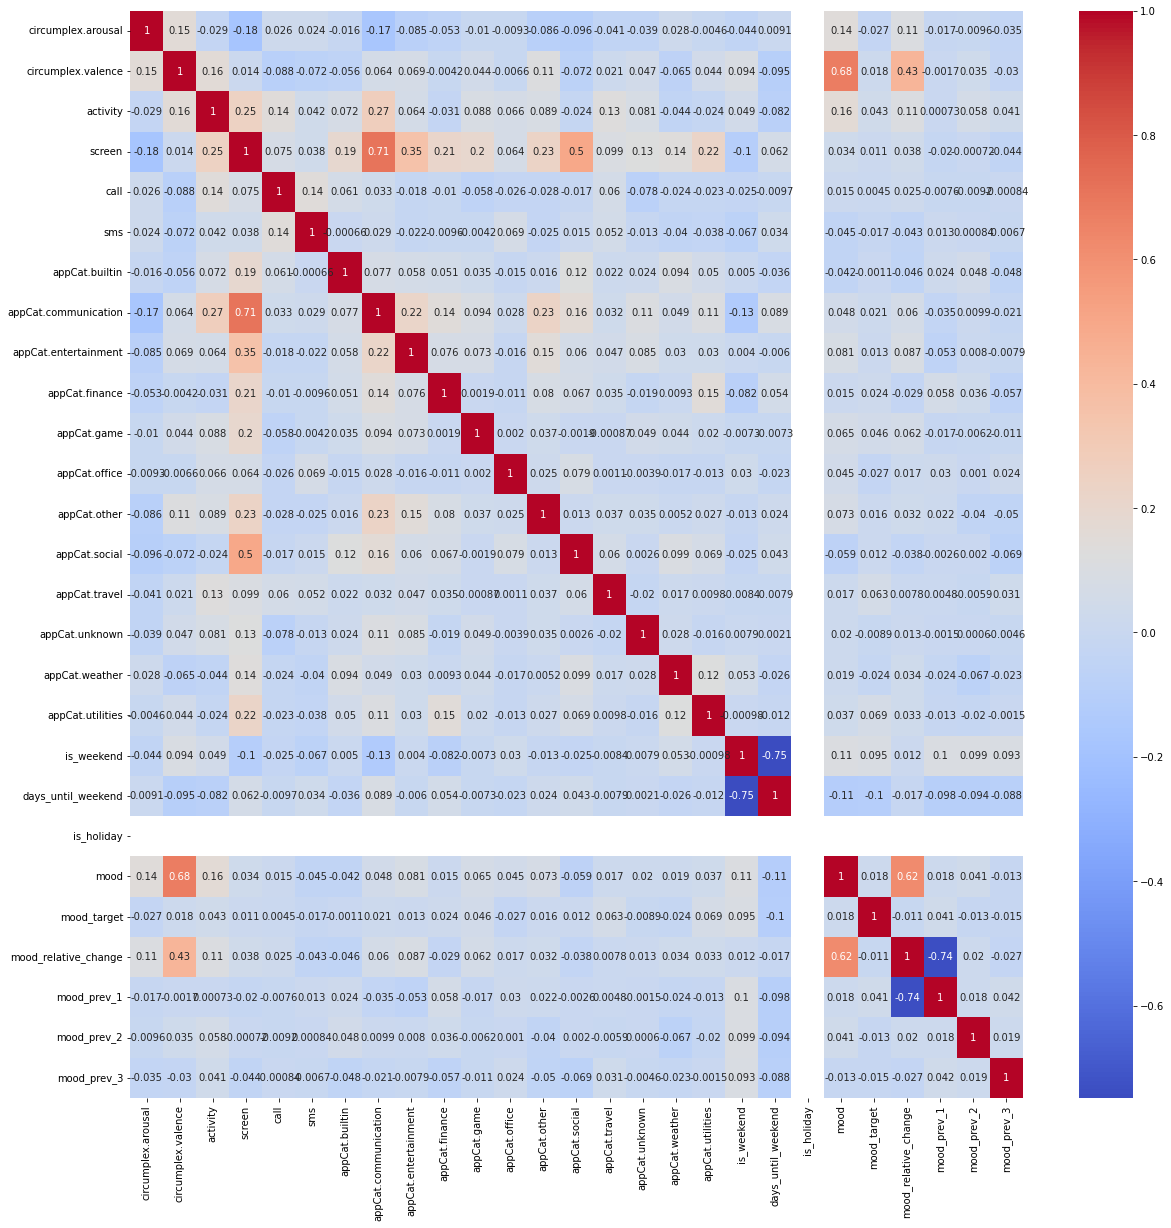

In [19]:
#add a random row to the df
# df = df.append({'date': '2014-7-1'}, ignore_index=True) #ketikoti
# df = df.append({'date': '2014-12-5'}, ignore_index=True) #sinterklaas


#plot heatmap of correlation
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')


## Normalise data

In [20]:
df.columns


Index(['date', 'id', 'circumplex.arousal', 'circumplex.valence', 'activity',
       'screen', 'call', 'sms', 'appCat.builtin', 'appCat.communication',
       'appCat.entertainment', 'appCat.finance', 'appCat.game',
       'appCat.office', 'appCat.other', 'appCat.social', 'appCat.travel',
       'appCat.unknown', 'appCat.weather', 'appCat.utilities', 'day_of_week',
       'is_weekend', 'days_until_weekend', 'is_holiday', 'mood', 'mood_target',
       'mood_relative_change', 'mood_prev_1', 'mood_prev_2', 'mood_prev_3'],
      dtype='object')

In [21]:
df.columns

to_normalise = ['mood', 'circumplex.arousal', 'circumplex.valence', 'activity',
       'screen', 'appCat.builtin', 'appCat.communication',
       'appCat.entertainment', 'appCat.finance', 'appCat.game',
       'appCat.office', 'appCat.other', 'appCat.social', 'appCat.travel',
       'appCat.unknown', 'appCat.weather', 'appCat.utilities','mood_relative_change']

to_rescale = ['day_of_week',
       'is_weekend', 'days_until_weekend', 'is_holiday',]

all_previous = [col for col in df.columns if ('prev' or 'target')  in col] #can use the same model as their original feature

In [22]:
# all_previous
[x for x in df.columns if x not in to_normalise ]

['date',
 'id',
 'call',
 'sms',
 'day_of_week',
 'is_weekend',
 'days_until_weekend',
 'is_holiday',
 'mood_target',
 'mood_prev_1',
 'mood_prev_2',
 'mood_prev_3']

In [23]:
#save current df 
# df.to_csv('Datasets/temp_feat.csv', index=False)

In [29]:
print(df['mood_relative_change'].describe())
df['mood_relative_change'].value_counts()

#update fitter and scikit with pip
!pip install --upgrade fitter
!pip install --upgrade scikit-learn

count    1304.000000
mean        0.012892
std         0.166966
min        -0.583333
25%        -0.085714
50%         0.000000
75%         0.093750
max         1.416667
Name: mood_relative_change, dtype: float64

[notice] A new release of pip available: 22.3.1 -> 23.1
[notice] To update, run: pip install --upgrade pip
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.1/9.1 MB 6.9 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 298.0/298.0 kB 4.4 MB/s eta 0:00:00a 0:00:01
  Attempting uninstall: joblib
    Found existing installation: joblib 1.1.0
    Uninstalling joblib-1.1.0:
      Successfully uninstalled joblib-1.1.0
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.1.1
    Uninstalling scikit-learn-1.1.1:
      Successfully uninstalled scikit-learn-1.1.1

[notice] A new release of pip available: 22.3.1 -> 23.1
[notice] To update, run: pip install --upgrade pip


In [31]:
#normalise mood_relative_change
test = ndf.normalise_collumn_with_loaded_or_new_model(df, 'mood_relative_change')
test

---------------------------------------------------------------------------------------------------- 
fit a model for mood_relative_change and transform the collumn (mood_relative_change not found)
 ----------------------------------------------------------------------------------------------------


Fitting 106 distributions:   0%|          | 0/106 [00:00<?, ?it/s]SKIPPED arcsine distribution (taking more than 30 seconds)
SKIPPED alpha distribution (taking more than 30 seconds)
SKIPPED anglit distribution (taking more than 30 seconds)
SKIPPED beta distribution (taking more than 30 seconds)
SKIPPED argus distribution (taking more than 30 seconds)
SKIPPED bradford distribution (taking more than 30 seconds)
SKIPPED betaprime distribution (taking more than 30 seconds)
SKIPPED burr12 distribution (taking more than 30 seconds)
SKIPPED burr distribution (taking more than 30 seconds)
SKIPPED cauchy distribution (taking more than 30 seconds)
SKIPPED chi distribution (taking more than 30 seconds)
SKIPPED chi2 distribution (taking more than 30 seconds)
SKIPPED cosine distribution (taking more than 30 seconds)
SKIPPED crystalball distribution (taking more than 30 seconds)
SKIPPED dgamma distribution (taking more than 30 seconds)
Fitting 106 distributions:  13%|█▎        | 14/106 [00:00<00:01,

KeyError: 'arcsine'

<AxesSubplot:xlabel='mood_relative_change', ylabel='Count'>

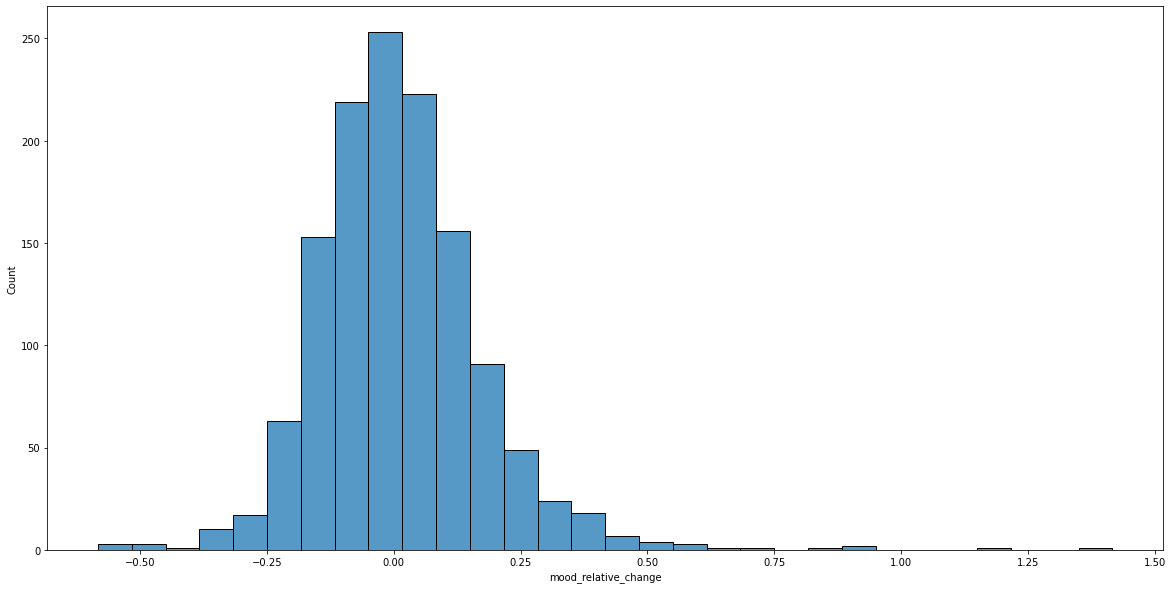

In [27]:
#make histogram of mood_relative_change
plt.figure(figsize=(20,10))
sns.histplot(data=test, x='mood_relative_change', bins=30)

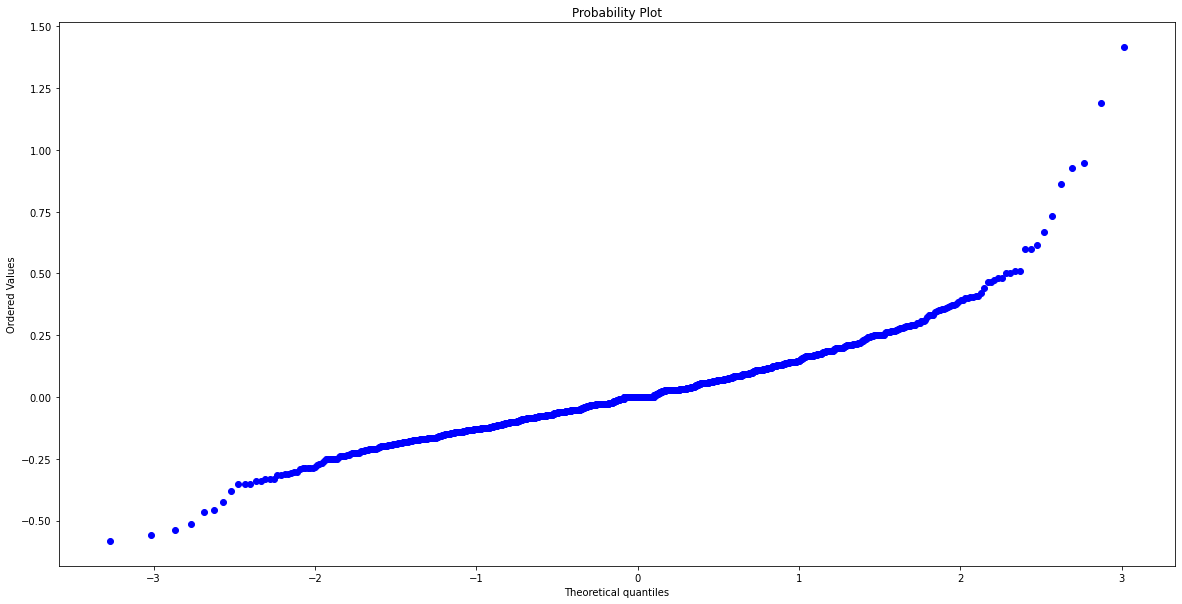

In [28]:
import scipy.stats as stats
#plot qqplot for mood_relative_change
plt.figure(figsize=(20,10))
stats.probplot(test['mood_relative_change'], dist="norm", plot=plt)
plt.show()

In [35]:
#display all the models form fitter
from fitter import Fitter
f = Fitter(test['mood_relative_change'][1:])
f.fit()
f.summary()


Fitting 106 distributions:  27%|██▋       | 29/106 [00:05<00:29,  2.63it/s]/Users/QuinnScot/.pyenv/versions/3.9.0/lib/python3.9/site-packages/scipy/stats/_continuous_distns.py:3102: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  t1 = integrate.quad(llc, -np.inf, x)[0]
/Users/QuinnScot/.pyenv/versions/3.9.0/lib/python3.9/site-packages/scipy/stats/_continuous_distns.py:3102: IntegrationWarning: The algorithm does not converge.  Roundoff error is detected
  in the extrapolation table.  It is assumed that the requested tolerance
  cannot be achieved, and that the returned result (if full_output = 1) is 
  the best which can be obtained.
  t1 = integrate.quad(llc, -np.inf, x)[0]
Fitting 106 distributions:  58%|█████▊    | 61/106 [00:18<00:41,  1.08it/s]

In [34]:
df['mood_relative_change'].isna().sum()

1

In [22]:
pre_norm = df

# def normalise_collumn_with_loaded_or_new_model(df, col):
#     #continue if there is not allready a file with the normalise model in the folder
#     if not os.path.isfile(f'stastical_distributions/model_dict_{col}.pkl'):
#         print('-'*100,f'\nfit a model for {col} and transform the collumn\n', '-'*100)
#         #fit a normalisation model and apply it to the collumn
#         normalised_col = ndf.normalise_collumn(df, collumn_name=col, only_collumn=True)
#     else:
#         print('-'*50,f'\nfound model for {col}')
#         #transform the collumn with the allready existing model
#         normalised_col = ndf.apply_statistical_model(df, collumn_name=col, only_collumn=True)

#     return normalised_col

# def normalise_collumns_from_list(df:pd.DataFrame, collumns_list):
#     #loop over collumns 
#     for col in collumns_list:
#         #normalise the collumn
#         df[col] = normalise_collumn_with_loaded_or_new_model(df, col)
#     return df

# # df = normalise_collumns_from_list(df, to_normalise)

In [23]:
to_normalise

['mood',
 'circumplex.arousal',
 'circumplex.valence',
 'activity',
 'screen',
 'appCat.builtin',
 'appCat.communication',
 'appCat.entertainment',
 'appCat.finance',
 'appCat.game',
 'appCat.office',
 'appCat.other',
 'appCat.social',
 'appCat.travel',
 'appCat.unknown',
 'appCat.weather',
 'appCat.utilities',
 'mood_relative_change']

In [ ]:


df.describe()

In [ ]:
df.head()

,date,id,circumplex.arousal,circumplex.valence,activity,screen,call,sms,appCat.builtin,appCat.communication,...,day_of_week,is_weekend,days_until_weekend,is_holiday,mood,mood_target,mood_relative_change,mood_prev_1,mood_prev_2,mood_prev_3
0,2014-03-04,AS14.17,0.500000,1.000000,0.042303,0.0,5.0,0.0,0.0,0.0,...,Tuesday,False,4,False,0.499849,6.333333,NaN,NaN,NaN,NaN
1,2014-03-05,AS14.08,0.000000,0.333333,0.005556,0.0,0.0,0.0,0.0,0.0,...,Wednesday,False,3,False,0.215816,8.000000,-0.095238,7.000000,NaN,NaN
2,2014-03-05,AS14.17,0.666667,1.333333,0.042303,0.0,1.0,1.0,0.0,0.0,...,Wednesday,False,3,False,0.801319,7.250000,0.263158,6.333333,7.000000,NaN
3,2014-03-06,AS14.17,0.500000,0.750000,0.042303,0.0,1.0,0.0,0.0,0.0,...,Thursday,False,2,False,0.744006,7.200000,-0.093750,8.000000,6.333333,7.000000
4,2014-03-06,AS14.08,-0.600000,0.600000,0.005556,0.0,0.0,13.0,0.0,0.0,...,Thursday,False,2,False,0.735227,7.500000,-0.006897,7.250000,8.000000,6.333333


In [ ]:
pre_norm.describe()

,mood
count,1305.000000
mean,7.006635
std,0.739451
min,3.000000
25%,6.600000
50%,7.000000
75%,7.500000
max,9.333333


In [ ]:
df.describe()['mood']

count    1305.000000
mean        0.516012
std         0.249060
min         0.140091
25%         0.237026
50%         0.499849
75%         0.772175
max         0.837349
Name: mood, dtype: float64

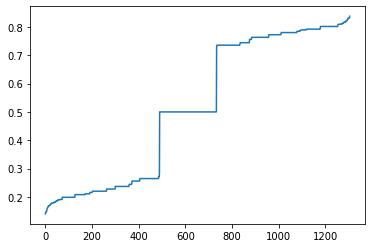

In [ ]:
#plot histogram of mood
plt.figure(figsize=(20,10))
sns.distplot(pre_norm['mood'], bins=20)

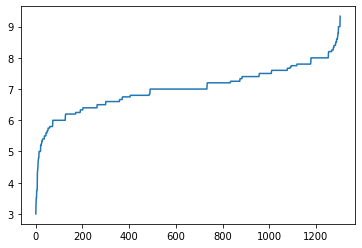

In [ ]:
#plot histogram of mood
plt.figure(figsize=(20,10))
sns.distplot(df['mood'], bins=20)

## One hot encoding for categorical variables (id)

In [ ]:
def one_hot_encode_feature(df:pd.DataFrame, feature:str):
    one_hot = pd.get_dummies(df[feature])
    df = df.drop(feature,axis = 1)
    df = df.join(one_hot)
    return df

df = one_hot_encode_feature(df, 'id')